<font face="Georgia" size=3>
    
Harsh Seksaria
    
2048011
    
2 - MDS
    
---
    
Machine Learning Lab 11
    
    Clustering Method
    
    23 April, 2021
    
---
    
CHRIST (Deemed to be University)
    
</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fl = pd.read_csv('../diabetes.csv')
fl.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Pre-processing

## Null Values

In [3]:
fl.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in the dataset.

## Duplicate Values

In [4]:
fl.duplicated().any()

False

There are no duplicate values in the dataset.

# Exploratory Data Analysis

## Dataset Shape

In [5]:
fl.shape

(768, 9)

There are 768 rows and 9 columns out of which 8 are the features and 1 is the target variable.

## Dataset Info

In [6]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Dataset description

In [7]:
fl.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Outcome Distribution

0    500
1    268
Name: Outcome, dtype: int64

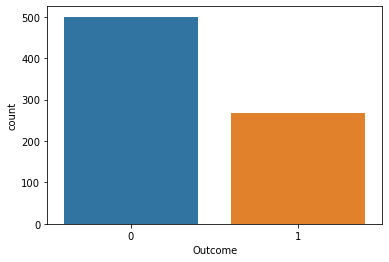

In [8]:
sns.countplot(x="Outcome", data=fl)
fl.Outcome.value_counts()

## Age Distribution

<AxesSubplot:xlabel='Age', ylabel='count'>

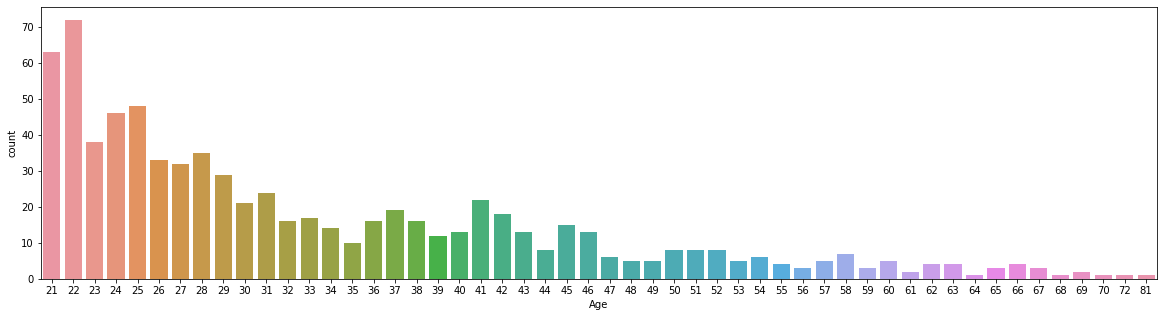

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(x="Age", data=fl)

# K-Means Clustering

In [10]:
x = fl.drop(['Outcome'], axis=1)
y = fl.Outcome

## Choosing the optimal number of clusters

### Elbow method

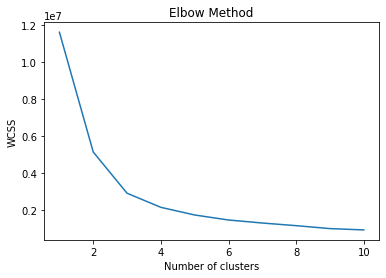

In [11]:
from sklearn.cluster import KMeans
wcss = []
for n in range(1,11):
    kmeans = KMeans(n_clusters=n, random_state=11)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the graph, we can take the clusters as 3 since the curve is not steep after that.

In [12]:
#KMeans with 3 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=8, random_state=11)
pred = kmeans.fit_predict(x)

In [13]:
frame = pd.DataFrame(x)
frame['Cluster']=pred
frame['Cluster'].value_counts()

1    495
0    235
2     38
Name: Cluster, dtype: int64

plt.figure(figsize=(12,8))
plt.scatter(x[pred==0,0], x[pred==0,1], s=100, c='blue', label='Cluster 1')
plt.scatter(x[pred==1,0], x[pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(x[pred==2,0], x[pred==2,1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='black', label='Centroids')
plt.title('Clusters')
plt.legend()

## Evaluation of K-Means

In [14]:
kmeans.inertia_

2913322.5800817804

The lesser value is better. Since value here is quite high, we can say that the model is not good fit.

# K-Modes Clustering

In [29]:
pip install KModes

Note: you may need to restart the kernel to use updated packages.


In [30]:
x2 = fl.loc[:, ['BloodPressure', 'Insulin']].values

## Choosing the optimal number of clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1105.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1053.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1008.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 963.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 919.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 876.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 836.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, mov

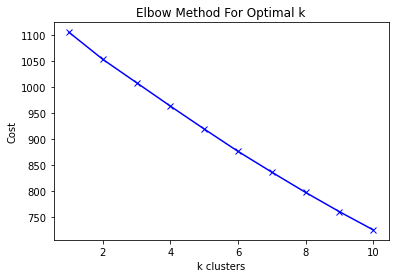

In [36]:
from kmodes.kmodes import KModes

cost = []
K = range(1,11)
for n in list(K):
    kmode = KModes(n_clusters=n, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(x2)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [37]:
kmodes = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
y_modes = kmodes.fit_predict(x)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 5110.0
Run 1, iteration: 2/100, moves: 0, cost: 5110.0


In [40]:
frame = pd.DataFrame(x)
frame['cluster'] = y_modes
frame['cluster'].value_counts()

0    438
1    150
2     99
3     81
Name: cluster, dtype: int64

The above output indicates that 438 values belong to the cluster 0, 150 to cluster 1, and so on.